In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import control as ct
from IPython.display import display, Latex
import plotly.graph_objects as go
import pandas as pd

#Adelanto 6-6

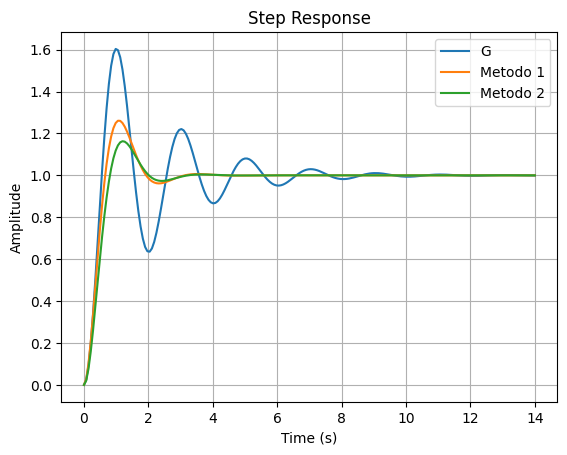

In [2]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

G=ct.tf([10],[1, 1, 0])
Gcl=ct.feedback(G,1)
Gc1=ct.zpk([-1.9432],[-4.6458],[1.2287])
GGc1=Gc1*G
GGc1cl=ct.feedback(GGc1,1)
Gc2=ct.zpk([-1],[-3],[0.9])
GGc2=Gc2*G
GGc2cl=ct.feedback(GGc2,1)

plt.figure()
t=np.linspace(0, 14, 200)
T,y = ct.step_response(Gcl, T=t)
plt.plot(T, y,label='G')
T,y = ct.step_response(GGc1cl, T=t)
plt.plot(T, y, label='Metodo 1')
T,y = ct.step_response(GGc2cl, T=t)
plt.plot(T, y, label='Metodo 2')
plt.title('Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid('on')
plt.show(block=True)

#Atraso 6-7

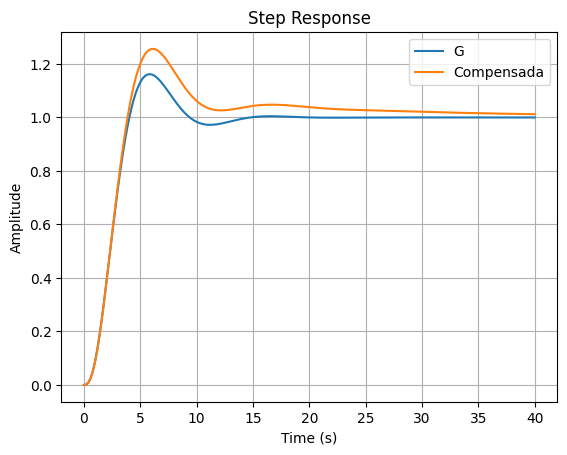

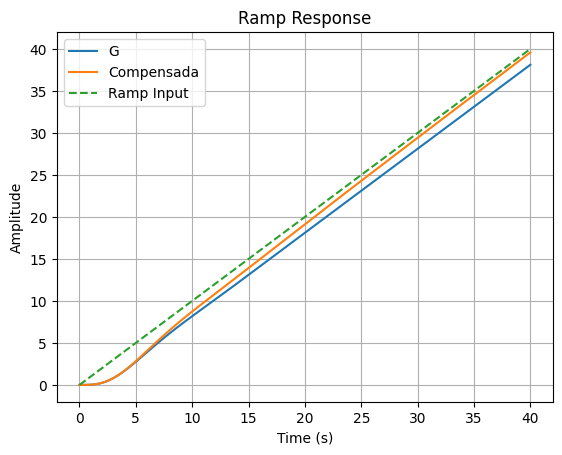

In [3]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

Gcl=ct.tf([1.06],[1, 3, 2, 1.06])
GGccl=ct.tf([1.0235, 0.0512],[1, 3.005, 2.015, 1.0335, 0.0512])

plt.figure()
t=np.linspace(0, 40, 200)
T,y = ct.step_response(Gcl,T=t)
plt.plot(T, y,label='G')
T,y = ct.step_response(GGccl,T=t)
plt.plot(T, y, label='Compensada')
plt.title('Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid('on')
plt.show(block=True)

s = ct.tf('s')

plt.figure()
t=np.linspace(0, 40, 200)
ramp=t
T,y = ct.step_response(Gcl/s,T=t)
plt.plot(T, y,label='G')
T,y = ct.step_response(GGccl/s,T=t)
plt.plot(T, y, label='Compensada')
plt.plot(T, ramp, label='Ramp Input', linestyle='--')
plt.title('Ramp Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid('on')
plt.show(block=True)


#Atraso-Adelanto 6-9

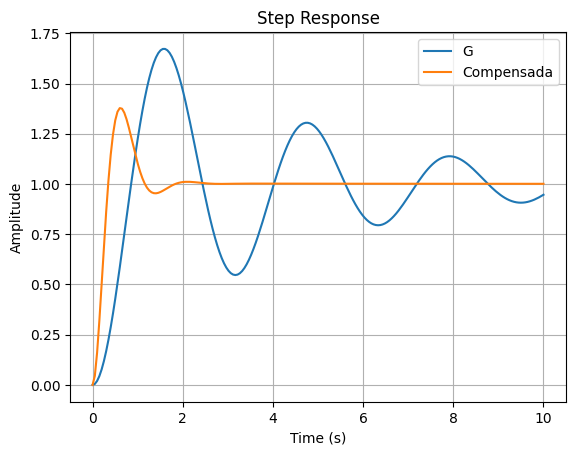

In [4]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

G=ct.tf([4],[1, 0.5, 0])
Gcl=ct.feedback(G,1)
Gc=ct.zpk([-2.38, -0.1],[-8.34, -0.0285],[10])
GGccl=ct.feedback(Gc*G,1)

plt.figure()
t=np.linspace(0, 10, 200)
T1,y1 = ct.step_response(Gcl,T=t)
plt.plot(T1, y1,label='G')
T2,y2 = ct.step_response(GGccl,T=t)
plt.plot(T2, y2, label='Compensada')
plt.title('Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid('on')
plt.show(block=True)

In [5]:
import plotly.graph_objects as go
import pandas as pd

df = pd.DataFrame({'t1': T1, 'y1': y1, 't2': T2, 'y2': y2})

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['t1'], y=df['y1'], mode='lines', name='G'))
fig.add_trace(go.Scatter(x=df['t2'], y=df['y2'], mode='lines', name='Compensada'))
fig.update_layout(autosize=False,
                  width=800,
                  height=400,
                  title='Titulo',
                  xaxis_title='Tiempo [S]',
                  yaxis_title='magnitud',
                  legend_title='Ganancias',
                  showlegend=True)
fig.show()

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def interactive_compensator_plot():
    def plot_response(zero, pole, gain):
        G = ct.tf([4], [1, 0.5, 0])
        Gc = ct.zpk([zero], [pole], [gain])
        GGccl = ct.feedback(Gc * G, 1)
        Gcl = ct.feedback(G, 1)

        t = np.linspace(0, 10, 200)
        T, y = ct.step_response(Gcl, T=t)
        plt.figure(figsize=(8, 5))
        plt.plot(T, y, label='G (Plant)')
        T, y = ct.step_response(GGccl, T=t)
        plt.plot(T, y, label='Compensated')
        plt.title('Step Response: Plant vs Forward Compensator')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(True)
        plt.show()

    interact(plot_response,
             zero=widgets.FloatSlider(value=-2.38, min=-10, max=0, step=0.01, description='Zero'),
             pole=widgets.FloatSlider(value=-8.34, min=-20, max=0, step=0.01, description='Pole'),
             gain=widgets.FloatSlider(value=10, min=0.1, max=20, step=0.1, description='Gain'))

interactive_compensator_plot()

interactive(children=(FloatSlider(value=-2.38, description='Zero', max=0.0, min=-10.0, step=0.01), FloatSlider…

In [7]:
import ipywidgets as widgets

def plotly_interactive_compensator():
    def update(zero, pole, gain):
        G = ct.tf([4], [1, 0.5, 0])
        Gc = ct.zpk([zero], [pole], [gain])
        GGccl = ct.feedback(Gc * G, 1)
        Gcl = ct.feedback(G, 1)
        t = np.linspace(0, 10, 200)
        T1, y1 = ct.step_response(Gcl, T=t)
        T2, y2 = ct.step_response(GGccl, T=t)
        df = pd.DataFrame({'t1': T1, 'y1': y1, 't2': T2, 'y2': y2})

        fig = go.Figure()
        fig.add_trace(go.Scatter(x=df['t1'], y=df['y1'], mode='lines', name='G'))
        fig.add_trace(go.Scatter(x=df['t2'], y=df['y2'], mode='lines', name='Compensada'))
        fig.update_layout(
            autosize=False,
            width=800,
            height=400,
            title='Step Response: Plant vs Compensated (Plotly)',
            xaxis_title='Tiempo [S]',
            yaxis_title='Magnitud',
            legend_title='Sistema',
            showlegend=True
        )
        fig.show()

    widgets.interact(
        update,
        zero=widgets.FloatSlider(value=-2.38, min=-10, max=0, step=0.01, description='Zero'),
        pole=widgets.FloatSlider(value=-8.34, min=-20, max=0, step=0.01, description='Pole'),
        gain=widgets.FloatSlider(value=10, min=0.1, max=20, step=0.1, description='Gain')
    )

plotly_interactive_compensator()

interactive(children=(FloatSlider(value=-2.38, description='Zero', max=0.0, min=-10.0, step=0.01), FloatSlider…

In [8]:
def steplot(sys):
    plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
    y, T = step(sys)
    plt.plot(T.T, y.T, label='Step Response')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(f'Step Response')
    plt.grid(True)
    plt.legend()

    fint=interpolate.interp1d(T, y, kind='cubic')
    info = stepinfo(sys)
    rt = info['RiseTime']
    ts = info['SettlingTime']
    settling_min = info['SettlingMin']
    settling_max = info['SettlingMax']
    overshoot = info['Overshoot']
    undershoot = info['Undershoot']
    peak = info['Peak']
    tp = info['PeakTime']

    yts=fint(ts)
    ytp=fint(tp)
    plt.text(ts*1.1, 0, f" Settling Time (Ts): {ts:.2f}\n"
    f" Peak Time (Tp): {tp:.2f}\n"f" Overshoot (%): {overshoot:.2f}\n"f"{(sys)}",
             fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    plt.plot(ts, yts, 'ro', label='Settling Time')
    plt.plot([ts,ts], [0,yts], 'r')
    plt.plot([tp,tp], [0,ytp],'g')
    plt.plot([0,tp], [ytp,ytp],'g')
    plt.plot(tp, ytp,'go', label='Peak Time')
    plt.legend()
    plt.show()

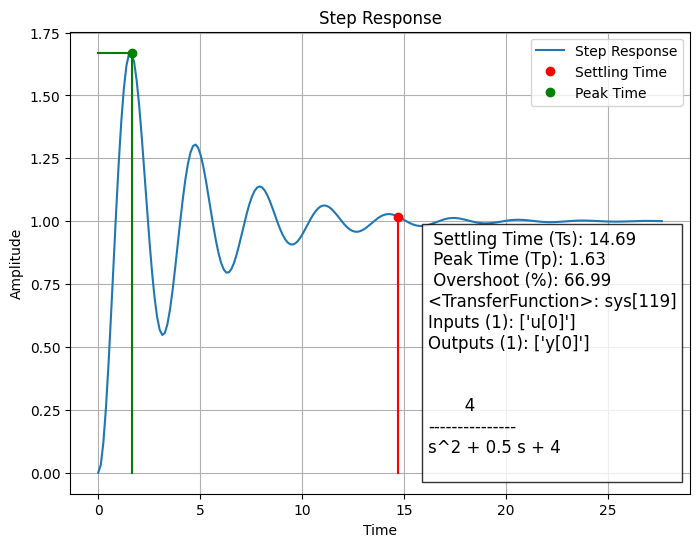

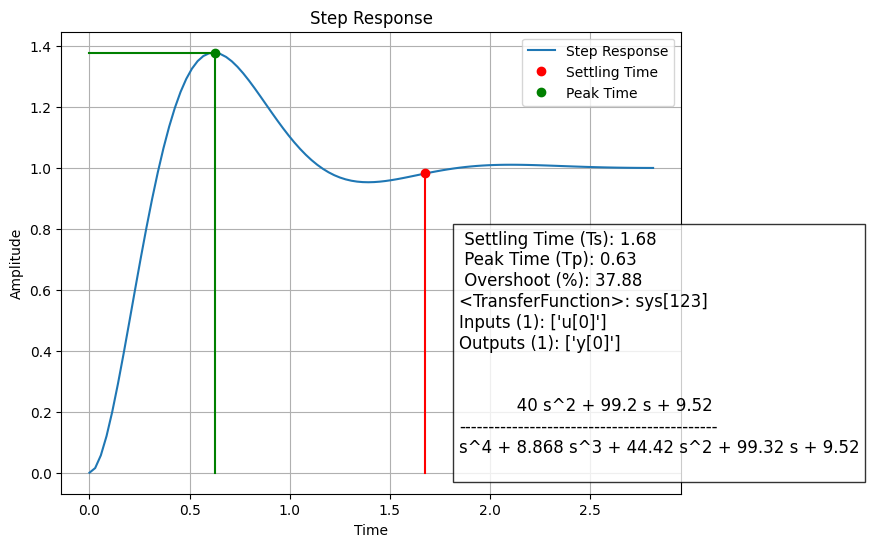

In [14]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
from control.matlab import *
import scipy.interpolate as interpolate


G=ct.tf([4],[1, 0.5, 0])
Gcl=ct.feedback(G,1)
Gc=ct.zpk([-2.38, -0.1],[-8.34, -0.0285],[10])
GGccl=ct.feedback(Gc*G,1)

steplot(Gcl)
steplot(GGccl)

In [10]:
ct.minreal(Gcl)

0 states have been removed from the model


TransferFunction(array([4.]), array([1. , 0.5, 4. ]))

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def interactive_compensator_plot():
    def plot_response(T, beta):
        zero=1/T
        pole=1/(beta*T)
        #G = ct.tf([4], [1, 0.5, 0])
        G=ct.tf([1.06],[1, 3, 2, 0])
        Gc = ct.zpk([-zero], [-pole],[1])
        GGccl = ct.feedback(Gc * G, 1)
        Gcl = ct.feedback(G, 1)
        Kv= 1.06/2
        kvc=beta*Kv

        t = np.linspace(0, 40, 200)
        T, y = ct.step_response(Gcl, T=t)
        plt.figure(figsize=(8, 5))
        plt.plot(T, y, label='G (Plant)')
        T, y = ct.step_response(GGccl, T=t)
        plt.plot(T, y, label='Compensated')
        plt.title('Step Response: Plant vs Forward Compensator')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(True)
        plt.show()
        print(f"Kv: {Kv:.2f}")
        print(f"Kvc: {kvc:.2f}")
        
    interact(plot_response,
             T=widgets.FloatSlider(value=20, min=1, max=50, step=1, description='T'),
             beta=widgets.FloatSlider(value=10, min=1, max=20, step=1, description='beta'))

interactive_compensator_plot()

interactive(children=(FloatSlider(value=20.0, description='T', max=50.0, min=1.0, step=1.0), FloatSlider(value…

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def interactive_compensator_plot():
    def plot_response(T, beta):
        zero=1/T
        pole=1/(beta*T)
        #G = ct.tf([4], [1, 0.5, 0])
        G=ct.tf([1.06],[1, 3, 2, 0])
        Gc = ct.zpk([-zero], [-pole],[1])
        GGccl = ct.feedback(Gc * G, 1)
        Gcl = ct.feedback(G, 1)
        Kv= 1.06/2
        kvc=beta*Kv

        t = np.linspace(0, 50, 1000)
        s = ct.tf('s')
        ramp = t
        T, y = ct.step_response(Gcl/s, T=t)
        plt.figure(figsize=(8, 5))
        plt.plot(T, y, label='G (Plant)')
        T, y = ct.step_response(GGccl/s, T=t)
        plt.plot(T, y, label='Compensated')
        plt.plot(T, ramp, label='Ramp Input', linestyle='--')
        plt.title('Ramp Response')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(True)
        plt.show()
        print(f"Kv: {Kv:.2f}")
        print(f"Kvc: {kvc:.2f}")
        
    interact(plot_response,
             T=widgets.FloatSlider(value=20, min=1, max=50, step=1, description='T'),
             beta=widgets.FloatSlider(value=10, min=1, max=20, step=1, description='beta'))

interactive_compensator_plot()

interactive(children=(FloatSlider(value=20.0, description='T', max=50.0, min=1.0, step=1.0), FloatSlider(value…

#Ejercicios OGATA

In [ ]:
#B-6-17 Pd=-2 +- j2sqrt(3)      
# G=ct.tf([5],[0.5, 1, 0])        
# Gc=ct.zpk([-2],[-4],[1.6])

#B-6-18 Pd=-1 +- j1             
# G=ct.tf([1],[1, 0, 0])          
# Gc=ct.zpk([-0.5],[-3],[4])

#B-6-19 Kv=20                   
# G=ct.tf([16],[1, 4, 0])         
# Gc=ct.zpk([-0.05],[-0.01],[1])

#B-6-20 Kv'=10*Kv               
# G=ct.zpk([],[0,-10,-20],[820])  
# Gc=ct.zpk([-0.25],[-0.025],[1])

#B-6-21 Kv=50 Pd=-2+-j2sqrt(3)  
# G=ct.zpk([],[0,-5,-2],[10])     
# Gc=ct.zpk([-2.2187,-0.1],[-27.1111,0.008184],[50])

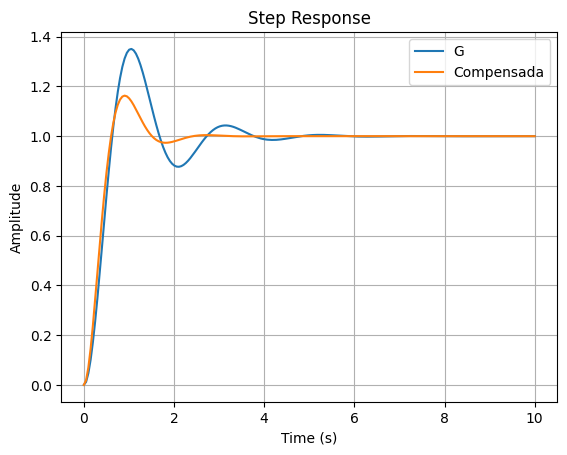

In [ ]:
#B-6-17 Pd=-2 +- j2sqrt(3)      G=ct.tf([5],[0.5, 1, 0])        Gc=ct.zpk([-2],[-4],[1.6])
#B-6-18 Pd=-1 +- j1             G=ct.tf([1],[1, 0, 0])          Gc=ct.zpk([-0.5],[-3],[4])
import control as ct
import matplotlib.pyplot as plt
import numpy as np

G=ct.tf([5],[0.5, 1, 0])
Gc=ct.zpk([-2],[-4],[1.6])
Gcl=ct.feedback(G,1)
GGccl=ct.feedback(Gc*G,1)

plt.figure()
t=np.linspace(0, 10, 200)
T1,y1 = ct.step_response(Gcl,T=t)
plt.plot(T1, y1,label='G')
T2,y2 = ct.step_response(GGccl,T=t)
plt.plot(T2, y2, label='Compensada')
plt.title('Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid('on')
plt.show(block=True)

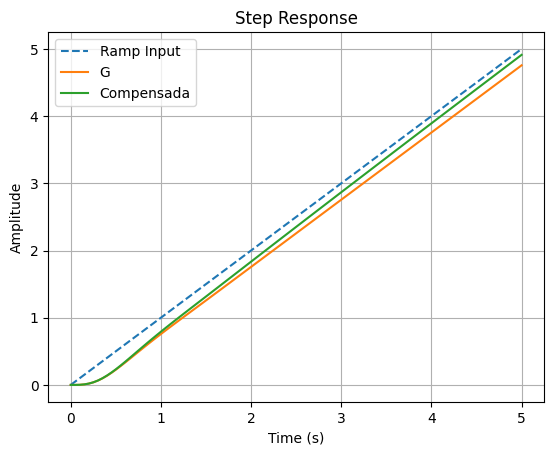

In [27]:
#B-6-19 Kv=20                   G=ct.tf([16],[1, 4, 0])         Gc=ct.zpk([-0.05],[-0.01],[1])
#B-6-20 Kv'=10*Kv               G=ct.zpk([],[0,-10,-20],[820])  Gc=ct.zpk([-0.25],[-0.025],[1])
import control as ct
import matplotlib.pyplot as plt
import numpy as np

G=ct.zpk([],[0,-10,-20],[820])
Gc=ct.zpk([-0.25],[-0.025],[1])
Gcl=ct.feedback(G,1)
GGccl=ct.feedback(Gc*G,1)

t = np.linspace(0, 5, 100)
s = ct.tf('s')

plt.figure()
ramp = t
plt.plot(t, ramp, label='Ramp Input', linestyle='--')
T1,y1 = ct.step_response(Gcl/s,T=t)
plt.plot(T1, y1,label='G')
T2,y2 = ct.step_response(GGccl/s,T=t)
plt.plot(T2, y2, label='Compensada')
plt.title('Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid('on')
plt.show(block=True)